In [576]:
import pandas as pd
import matplotlib
import math
import random
from matplotlib import pyplot as plt
import numpy
import geopandas as gpd
from shapely import Point
%matplotlib inline

# avoiding Type 3 fonts in matplotlib plots
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

font = {'size'   : 20}

matplotlib.rc('font', **font)
matplotlib.rc('lines', linewidth=2.0)
matplotlib.rc('lines', markersize=8)

pd.set_option('display.max_rows', 500)

In [577]:
# configure simulation
input_file = 'data/gis_incidences_nona.pkl'
number_of_simulations = 10000000
a = 1.1
lk_identifier = 48
#starting_points = ((51, 42), (135, 142), (55, 250))
starting_points = ((351, 342), (435, 442), (355, 550))

# create grid
width = 1000 #215
height = 1000 #295
grid_side = 3

# width: 640km => 215 grid entries
# height: 876km => 295 grid entries
# => approx. 3km x 3km grid

grid = numpy.zeros((height, width), dtype=[('x', 'i8'), ('y', 'i8'), ('z', 'i8')])

In [578]:
# simulate movements
for j in range(0, len(starting_points)):
    i = 0
    while i <= number_of_simulations:
        angle = random.uniform(0, 2 * math.pi)
        x = random.uniform(0, 1)
        d = (math.pow(x, (-1 / (a - 1)))) / 110 # convert distance to km, germany is approx. 876km high and 8 units in the current map
        pos_x = ((starting_points[j][0] * grid_side) + grid_side / 2) + (d * math.cos(angle))
        pos_y = ((starting_points[j][1] * grid_side) + grid_side / 2) + (d * math.sin(angle))

        if (0 <= pos_x < grid_side * width) and (0 <= pos_y < grid_side * height) \
                and (not ((math.floor(pos_x / grid_side) == starting_points[j][0]) and (math.floor(pos_y / grid_side) == starting_points[j][1]))):
            grid[math.floor(pos_y / grid_side)][math.floor(pos_x / grid_side)][j] += 1
            i += 1

# simulate movements
#i = 0
#while i <= number_of_simulations:
#    angle = random.uniform(0, 2 * math.pi)
#    x = random.uniform(0, 1)
#    d = (math.pow(x, (-1 / (a - 1)))) / 110 # convert distance to km, germany is approx. 876km high and 8 units in the current map
#    pos_x = ((starting_point_x * grid_side) + grid_side / 2) + (d * math.cos(angle))
#    pos_y = ((starting_point_y * grid_side) + grid_side / 2) + (d * math.sin(angle))
#
#    while not ((0 <= pos_x <= grid_side * width) and (0 <= pos_y <= grid_side * height)):
#        angle = random.uniform(0, 2 * math.pi)
#        pos_x = ((starting_point_x * grid_side) + grid_side / 2) + (d * math.cos(angle))
#        pos_y = ((starting_point_y * grid_side) + grid_side / 2) + (d * math.sin(angle))
#
#    grid[math.floor(pos_x / grid_side)][math.floor(pos_y / grid_side)][0] += 1
#    i += 1

# print(grid)

In [579]:
# sum up the number of hits for a certain radius and set this sum as value to every square on this radius
# repeat this for every starting point

# Function to calculate the distance between two points
def calculate_distance(x1, y1, x2, y2):
    return math.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)

# Calculate the coordinates of the center of each square
square_centers = []
for i in range(height):
    for j in range(width):
        x = (i + 0.5) * grid_side
        y = (j + 0.5) * grid_side
        square_centers.append((x, y))

# Calculate the sum of values in the squares on the radius
distance = 4.5
sum_values = 0
squares_on_radius = set()
squares_on_current_radius = []
starting_point_x = starting_points[0][0] * grid_side
starting_point_y = starting_points[0][1] * grid_side

increase_radius = True
max_radius = math.ceil(295 / 2) * grid_side

# Iterate over the square indices in a spiral pattern
for i in range(0, 3):
    for radius in range(1, max_radius // grid_side + 1):
        for angle in range(0, 360):
            angle_rad = math.radians(angle)
            pos_x = (starting_points[i][0] * grid_side) + distance * math.cos(angle_rad)
            pos_y = (starting_points[i][1] * grid_side) + distance * math.sin(angle_rad)

            idx_x = math.floor(pos_x / grid_side)
            idx_y = math.floor(pos_y / grid_side)
            pos_idx = (idx_x, idx_y)

            if pos_idx not in squares_on_radius:
                squares_on_radius.add(pos_idx)
                sum_values += grid[idx_y][idx_x][i]

                if pos_idx not in squares_on_current_radius:
                    squares_on_current_radius.append(pos_idx)

        for square in squares_on_current_radius:
            grid[square[1]][square[0]][i] = sum_values
        sum_values = 0
        distance += grid_side
        squares_on_current_radius = []

    distance = 4.5
    squares_on_radius = set()

#print(squares_on_radius)
#print(sum_values)
#print((math.floor(starting_points[0][0] / grid_side), math.floor(starting_points[0][1] / grid_side)))

In [ ]:
# sum up the number of hits for a certain radius and set this sum as value to every square on this radius
# repeat this for every starting point

# Function to calculate the distance between two points
def calculate_distance(x1, y1, x2, y2):
    return math.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)

# Calculate the coordinates of the center of each square
square_centers = []
for i in range(height):
    for j in range(width):
        x = (i + 0.5) * grid_side
        y = (j + 0.5) * grid_side
        square_centers.append((x, y))

# Calculate the sum of values in the squares on the radius
distance = 1.5
sum_values = 0
squares_on_radius = []
starting_point_x = starting_points[0][0] * grid_side
starting_point_y = starting_points[0][1] * grid_side

increase_radius = True

while starting_point_x - distance > 0:
    for angle in range(0, 720):
        angle_rad = math.radians(angle / 2)
        pos_x = starting_point_x + distance * math.cos(angle_rad)
        pos_y = starting_point_y + distance * math.sin(angle_rad)

        for i, center in enumerate(square_centers):
            center_x, center_y = center
            if calculate_distance(center_x, center_y, pos_x, pos_y) <= grid_side / 2:
                idx_x = math.floor(center_x / grid_side)
                idx_y = math.floor(center_y / grid_side)
                pos_idx = (idx_x, idx_y)

                if pos_idx not in squares_on_radius:
                    squares_on_radius.append(pos_idx)
                    sum_values += grid[idx_y][idx_x][0]
                break

    for square in squares_on_radius:
        grid[square[1], square[0]] = sum_values

    distance += 3
    sum_values = 0
    increase_radius = len(squares_on_radius) > 0
    squares_on_radius = []

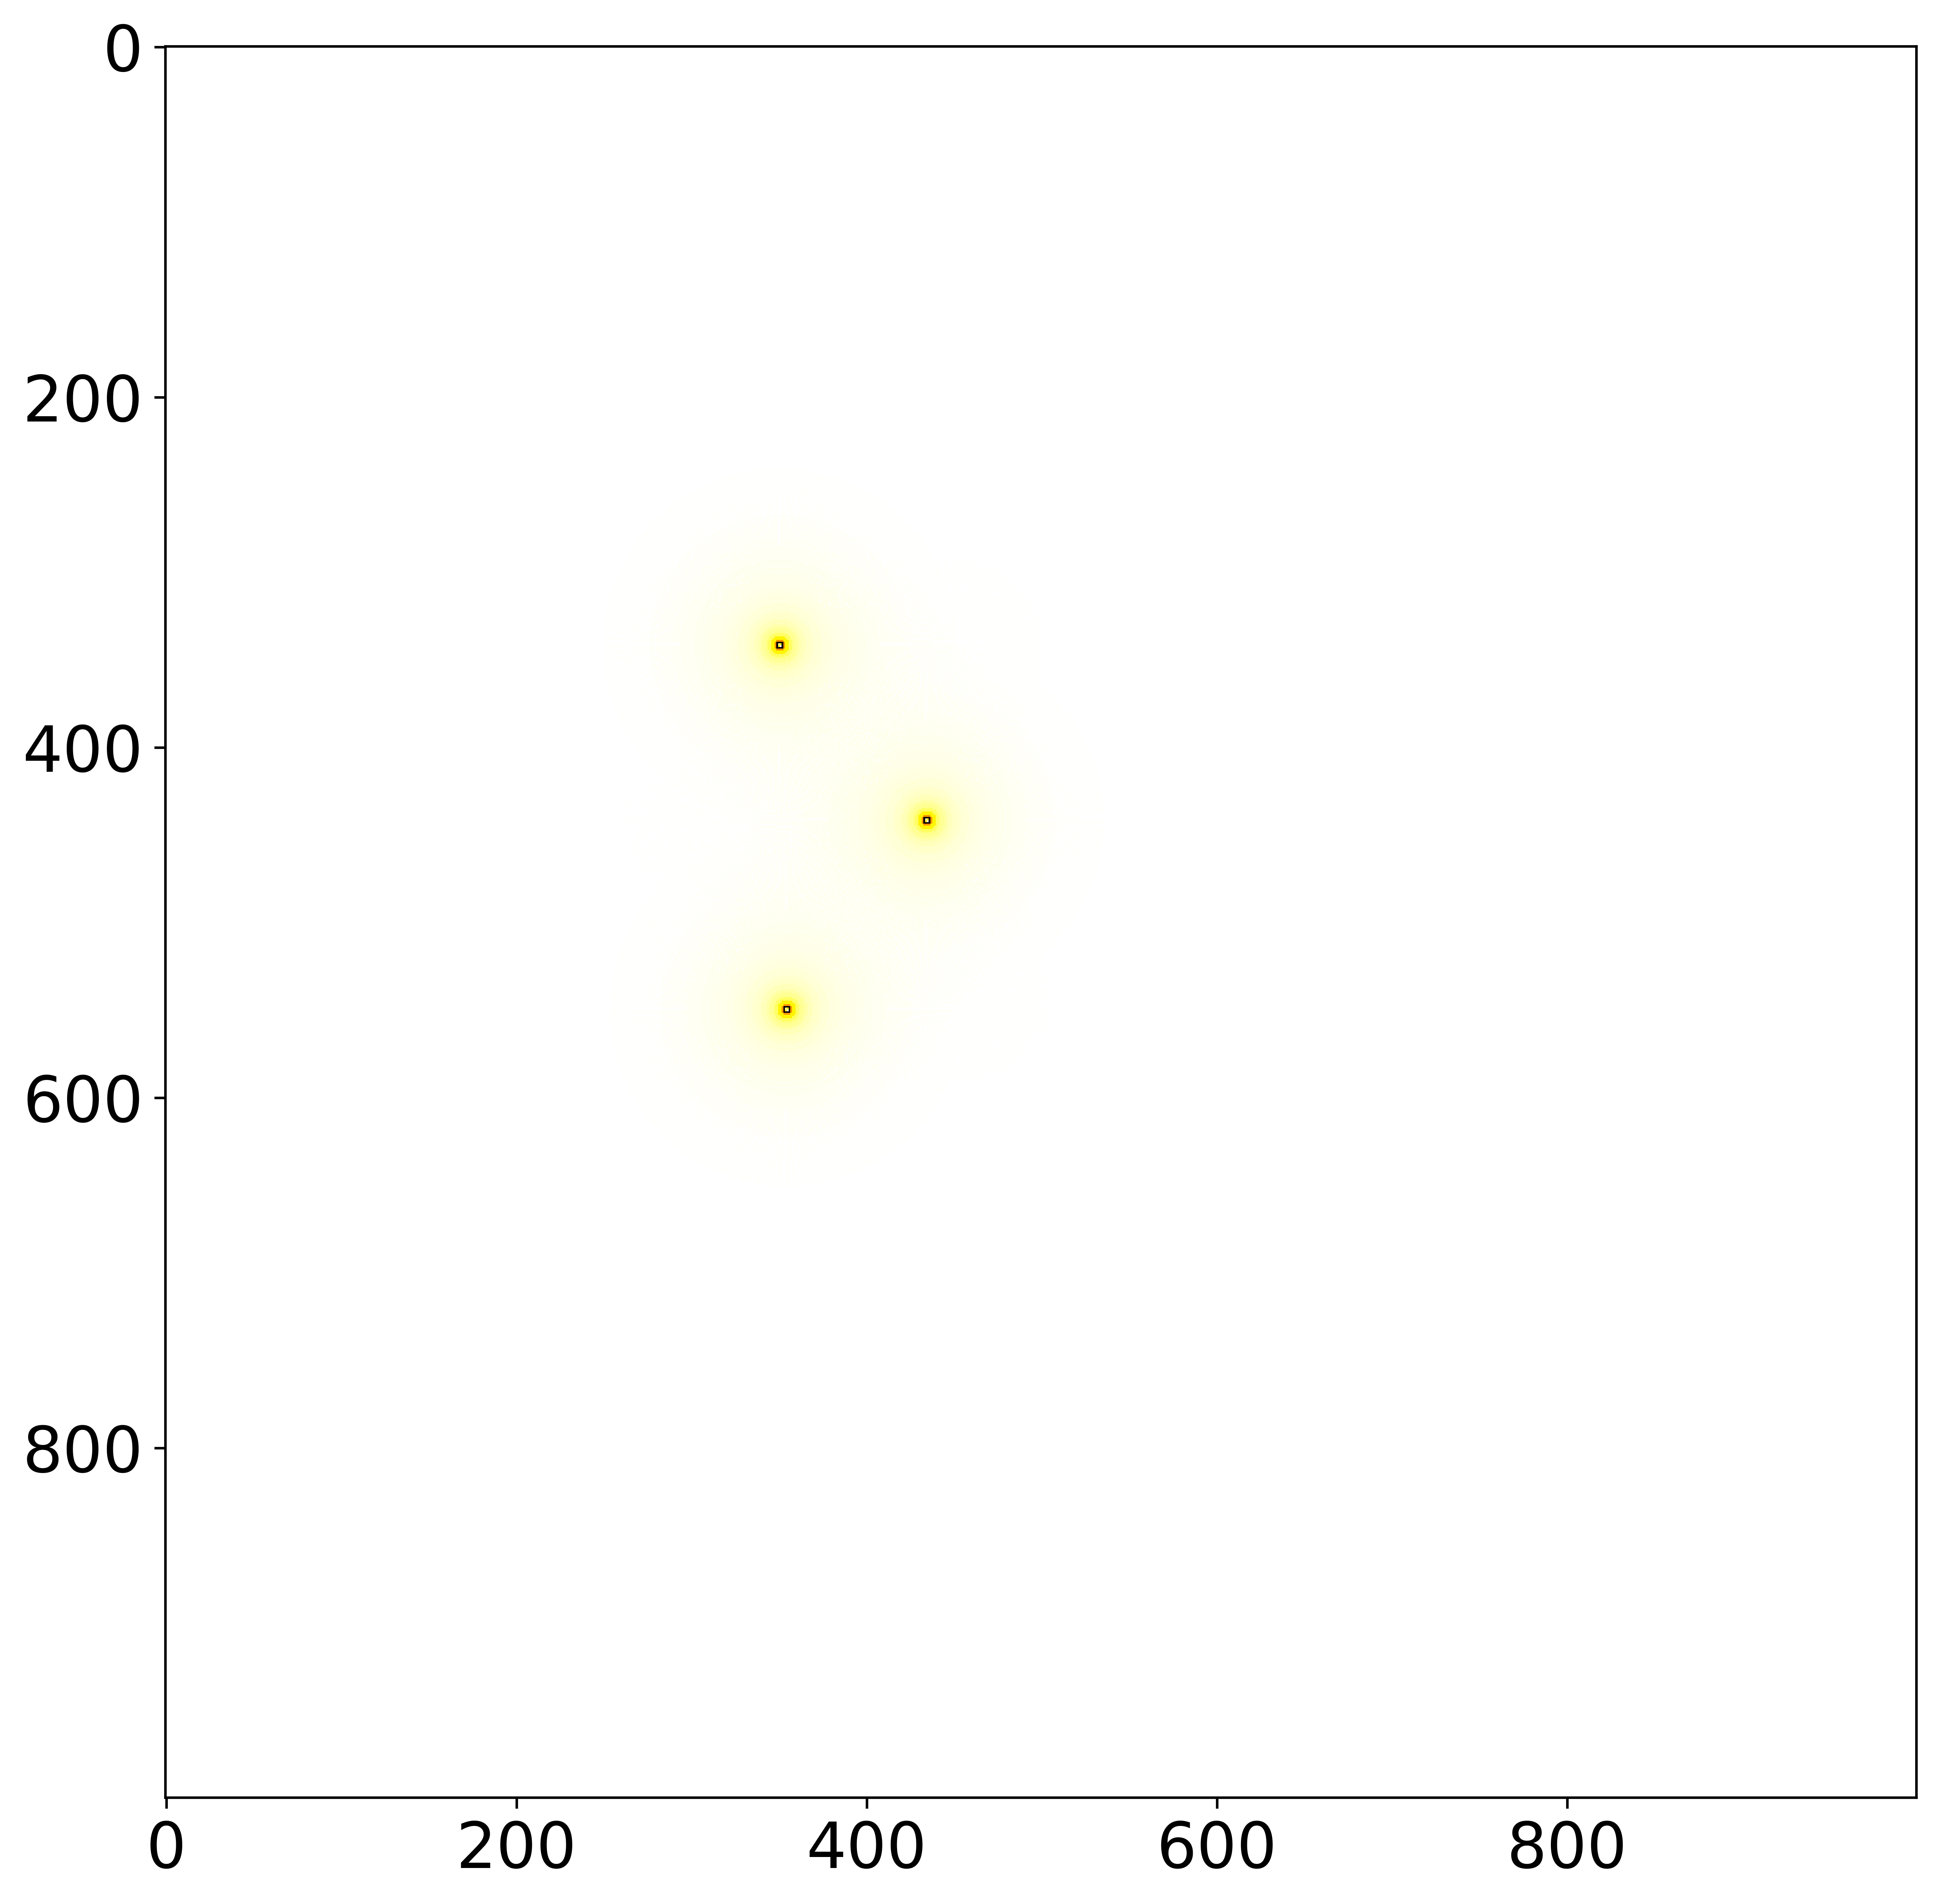

In [580]:
grid_cumulative = numpy.zeros((height, width))

i = 0
j = 0
for i in range (0, height):
    for j in range (0, width):
        grid_cumulative[i][j] += grid[i][j][0] + grid[i][j][1] + grid[i][j][2]

# print(grid_cumulative)

plt.rcParams['figure.dpi'] = 600
plt.rcParams['savefig.dpi'] = 600

fig, ax = plt.subplots(1, 1,figsize=(20, 10))
ax.imshow(grid_cumulative, cmap='hot_r', interpolation="none")
plt.savefig("output.svg", format="svg", bbox_inches="tight")
#plt.show()